In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
%matplotlib inline
from sklearn.svm import SVC
import pickle

In [2]:
x_test = np.load('test_x.npy')
y_test = np.load('test_y.npy')
x_test.shape, y_test.shape

((145, 4), (145, 5))

In [2]:
df = pd.read_csv('/home/jongli/Dropbox/project/NBM/Crime_data.csv')
df.head()

,Date,Category,Thana,District,DayOfWeek,Season
0,02-03-2018,Murder,Belabo Thana,Narsingdi,Friday,Summer
1,29-04-2017,Gang rape,Rajoir Thana,Madaripur,Saturday,Summer
2,29-06-2017,Murder,Ghatail Thana,Tangail,Thursday,Summer
3,01-07-2017,Murder,Keraniganj Model Thana,Dhaka,Saturday,Rainy
4,25-12-2017,Murder,Manikganj Thana,Manikganj,Monday,Winter


In [3]:
df['Month'] = df['Date'].apply(lambda x: int(str(x)[3:5]))
df.head()

,Date,Category,Thana,District,DayOfWeek,Season,Month
0,02-03-2018,Murder,Belabo Thana,Narsingdi,Friday,Summer,3
1,29-04-2017,Gang rape,Rajoir Thana,Madaripur,Saturday,Summer,4
2,29-06-2017,Murder,Ghatail Thana,Tangail,Thursday,Summer,6
3,01-07-2017,Murder,Keraniganj Model Thana,Dhaka,Saturday,Rainy,7
4,25-12-2017,Murder,Manikganj Thana,Manikganj,Monday,Winter,12


In [4]:
y = df.iloc[:,1]
x = df.drop(df.columns[[0,1]], axis = 1)


In [5]:
x.head()

,Thana,District,DayOfWeek,Season,Month
0,Belabo Thana,Narsingdi,Friday,Summer,3
1,Rajoir Thana,Madaripur,Saturday,Summer,4
2,Ghatail Thana,Tangail,Thursday,Summer,6
3,Keraniganj Model Thana,Dhaka,Saturday,Rainy,7
4,Manikganj Thana,Manikganj,Monday,Winter,12


In [6]:
y.head()


0       Murder
1    Gang rape
2       Murder
3       Murder
4       Murder
Name: Category, dtype: object

In [7]:
x = x.drop(x.columns[[3]], axis = 1)
x.head()

,Thana,District,DayOfWeek,Month
0,Belabo Thana,Narsingdi,Friday,3
1,Rajoir Thana,Madaripur,Saturday,4
2,Ghatail Thana,Tangail,Thursday,6
3,Keraniganj Model Thana,Dhaka,Saturday,7
4,Manikganj Thana,Manikganj,Monday,12


In [8]:
le = preprocessing.LabelEncoder()
x['Thana'] = le.fit_transform(x['Thana'])

thana_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(thana_mapping)

{'Alfadanga Thana': 0, 'Araihazar Thana': 1, 'Ashulia Thana': 2, 'Austagram Thana': 3, 'Bajitpur Thana': 4, 'Baliakandi Thana': 5, 'Bangabandhu Setu East Thana': 6, 'Basail Thana': 7, 'Belabo Thana': 8, 'Bhairab Thana': 9, 'Bhanga Thana': 10, 'Bhedarganj Thana': 11, 'Bhuapur Thana': 12, 'Boalmari Thana': 13, 'Bondor Thana': 14, 'Charbhadrasan Thana': 15, 'Damudya Thana': 16, 'Dasar Thana': 17, 'Daulatpur Thana': 18, 'Delduar Thana': 19, 'Dhamrai Thana': 20, 'Dhanbari Thana': 21, 'Dohar Thana': 22, 'Faridpur Thana': 23, 'Fatullah Model Thana': 24, 'Gazaria Thana': 25, 'Ghatail Thana': 26, 'Ghior Thana': 27, 'Goalandaghat Thana': 28, 'Gopalganj Thana': 29, 'Gopalpur Thana': 30, 'Goshairhat Thana': 31, 'Harirampur Thana': 32, 'Hossainpur Thana': 33, 'Itna Thana': 34, 'Joydebpur Thana': 35, 'Kaliakair Thana': 36, 'Kaliganj Thana': 37, 'Kalihati Thana': 38, 'Kalkini Thana': 39, 'Kalukhali Thana': 40, 'Kapasia Thana': 41, 'Karimganj Thana': 42, 'Kashiani Thana': 43, 'Katiadi Model Thana': 44

In [9]:
x['District'] = le.fit_transform(x['District'])

district_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(district_mapping)


{'Dhaka': 0, 'Faridpur': 1, 'Gazipur': 2, 'Gopalganj': 3, 'Kishoreganj': 4, 'Madaripur': 5, 'Manikganj': 6, 'Munshiganj': 7, 'Narayanganj': 8, 'Narsingdi': 9, 'Rajbari': 10, 'Shariatpur': 11, 'Tangail': 12}


In [10]:
x['DayOfWeek'] = le.fit_transform(x['DayOfWeek'])
week_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(week_mapping)

{'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [11]:
x.head()

,Thana,District,DayOfWeek,Month
0,8,9,0,3
1,75,5,2,4
2,26,12,4,6
3,45,0,2,7
4,55,6,1,12


In [12]:
x_np = np.array(x)
x_np.shape

(1448, 4)

In [13]:
y.head()

0       Murder
1    Gang rape
2       Murder
3       Murder
4       Murder
Name: Category, dtype: object

In [14]:
y_np = np.array(y)
y_np.shape
y_np = y_np.reshape(-1,1)# reshaping from (1448,) to (1448,1)
y_np.shape

(1448, 1)

In [15]:
y_np[:10]

array([['Murder'],
       ['Gang rape'],
       ['Murder'],
       ['Murder'],
       ['Murder'],
       ['Robbery'],
       ['Murder'],
       ['Murder'],
       ['Murder'],
       ['Murder']], dtype=object)

In [16]:
y_le = le.fit_transform(y_np)#converting categorical label with label encoder
y_le.shape

/home/jongli/anaconda3/envs/crime/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1448,)

In [17]:
y_le = y_le.reshape(-1,1)#reshaping from (1448,) to (1448,1)
y_le[:10]

array([[2],
       [0],
       [2],
       [2],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2]])

In [18]:
ohe = preprocessing.OneHotEncoder(sparse = False)
y_ohe = ohe.fit_transform(y_le)# converting label encoder to one hot encoding 
y_ohe.shape

/home/jongli/anaconda3/envs/crime/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(1448, 5)

In [19]:
y_ohe[:10]

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [20]:
x_np.shape, y_ohe.shape

((1448, 4), (1448, 5))

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_np, y_ohe, test_size=0.1, random_state=42, shuffle = True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1303, 4), (145, 4), (1303, 5), (145, 5))

In [22]:
# svc = SVC()
 
# param_grid = { 
#            "kernel" : ['rbf'],
#            "gamma" : [1,0.01,0.001],
#            "C" : [100,200,300,500]
# }
 
# CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
# CV_svc.fit(x_train, y_train.argmax(axis = 1))
# print (CV_svc.best_params_)

In [23]:
svc = SVC(kernel = 'rbf', C = 200, gamma = 0.001)
scores = cross_val_score(svc, x_train, y_train.argmax(axis = 1), cv = 10, scoring = 'accuracy')
print(scores.mean())

0.6040250526129527


In [26]:
svm_clf = SVC(kernel = 'rbf', C = 200, gamma = 0.001)
svm_clf.fit(x_train, y_train.argmax(axis = 1))
# save the model to disk
filename = './model/raw_svm.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

In [27]:
svm_pred = svm_clf.predict(x_test)
svm_pred.shape

(145,)

In [28]:
svm_train = accuracy_score(y_train.argmax(axis = 1), svm_clf.predict(x_train))
svm_test = accuracy_score(y_test.argmax(axis = 1), svm_pred)
svm_train, svm_test

(0.6070606293169608, 0.6758620689655173)

In [29]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test.argmax(axis = 1), svm_pred)
svm_cm

array([[ 0,  0, 11,  1,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0, 97,  0,  0],
       [ 0,  0, 17,  1,  0],
       [ 0,  0, 10,  0,  0]])

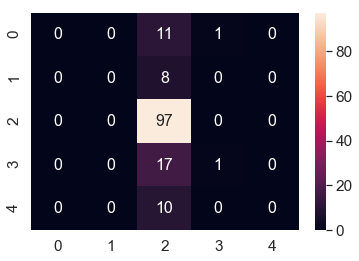

In [30]:
df_cm = pd.DataFrame(svm_cm, range(5),
                  range(5))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size